<a href="https://colab.research.google.com/github/schwallergroup/ai4chem_course/blob/main/notebooks/04 - Unsupervised Learning/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 tutorial 1 - AI 4 Chemistry

## Table of content

1. Unsupervised learning: dimensionality reduction
2. PCA
3. t-SNE
4. TMAP

# 0. Relevant packages

### Scikit-learn
We will use again the `scikit-learn` package, which contains the `PCA` and `TSNE` methods that we will implement.

### TMAP
Explain TMAP


We first install our usual libraries.

In [ ]:
#Install libraries
!pip install numpy scipy matplotlib scikit-learn pandas rdkit 



#Download ESOL dataset
!wget https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/esol.csv -O data/esol.csv

# 1. - Dimensionality reduction

#TO DO: write introduction about dimensionality reduction

# 2. - PCA

Principal Component Analysis (PCA), is a dimensionality reduction algorithm that is commonly used to visualize high-dimensional datasets in a simple manner. 

### Exercise 1: ESOL dataset dimensionality reduction

In this exercise, we will apply PCA to the 2048-dimensional fingerprints representing the molecules in the ESOL dataset. We will try to reduce this space to 2 dimensions and plot the resulting space. 

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
import numpy as np

#Load ESOL
esol = pd.read_csv('data/esol.csv')

### YOUR CODE #####

#Create a 'Molecule' column containing rdkit.Mol from each molecule
PandasTools.AddMoleculeColumnToFrame(esol, smilesCol='smiles', molCol='Molecule')

#Create Morgan fingerprints (r=2, nBits=2048) from Molecule column using apply()
esol['fp'] = esol['Molecule'].apply(lambda x: np.array(AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048)))

####

esol.head()


Now, we apply the PCA decomposition

In [29]:
from sklearn.decomposition import PCA

#### YOUR CODE ####

#create PCA object
pca = PCA(n_components=2) #n components should be 2

#Create a numpy array containing the fingerprints
X = np.array([x for x in esol['fp']]) 

#Apply the fit_transform method to the previous array and store it in coordinates
coords = pca.fit_transform(X)

#Create 
esol['PC1'] = coords.T[0]
esol['PC2'] = coords.T[1]


Let's plot the two components

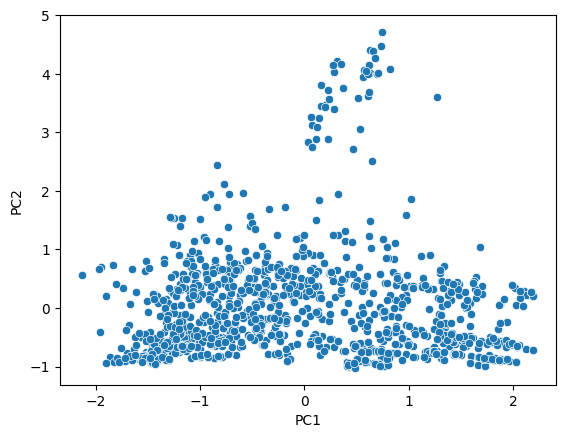

In [32]:
import seaborn as sns

sns.scatterplot(data=esol, x='PC1', y='PC2');

#ADD labels to the plot

# 3. - t-SNE

t-SNE example

# 4. - TMAP

Clustering and cool stuff using TMAP